In [ ]:
import json
%pip install requests pandas matplotlib seaborn python-dotenv, warnings, IPython

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import os
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv('API_KEY')
url = "https://v3.football.api-sports.io/leagues"

payload = {}
headers = {
    'x-rapidapi-key': api_key,
    'x-rapidapi-host': 'v3.football.api-sports.io'
}

response = requests.request("GET", url, headers=headers, data=payload)

data = json.loads(response.text)


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: 'python-dotenv,': Expected end or semicolon (after name and no valid version specifier)
    python-dotenv,
                 ^


Note: you may need to restart the kernel to use updated packages.


In [2]:
"""
Normalize the nested JSON data into a flat table using pd.json_normalize() and set pandas options to display all columns and column widths without truncation.
Print the first few rows of the DataFrame to verify the data and save the DataFrame to a CSV file for further analysis.
Finally, print specific columns from the DataFrame to show examples of accessing information.
Steps:
1. Normalize the nested JSON data from the 'response' key in the 'data' dictionary into a flat table using pd.json_normalize().
2. Set pandas options to display all columns and column widths without truncation for better readability.
3. Print the first few rows of the resulting DataFrame to verify the data.
4. Save the DataFrame to a CSV file named 'leagues.csv' for further analysis.
5. Print specific columns ('league_id', 'league_name', 'country_name') from the DataFrame to show examples of accessing information.
"""
leagues = pd.json_normalize(data['response'], sep='_')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

leagues.to_csv('leagues.csv', index=False)



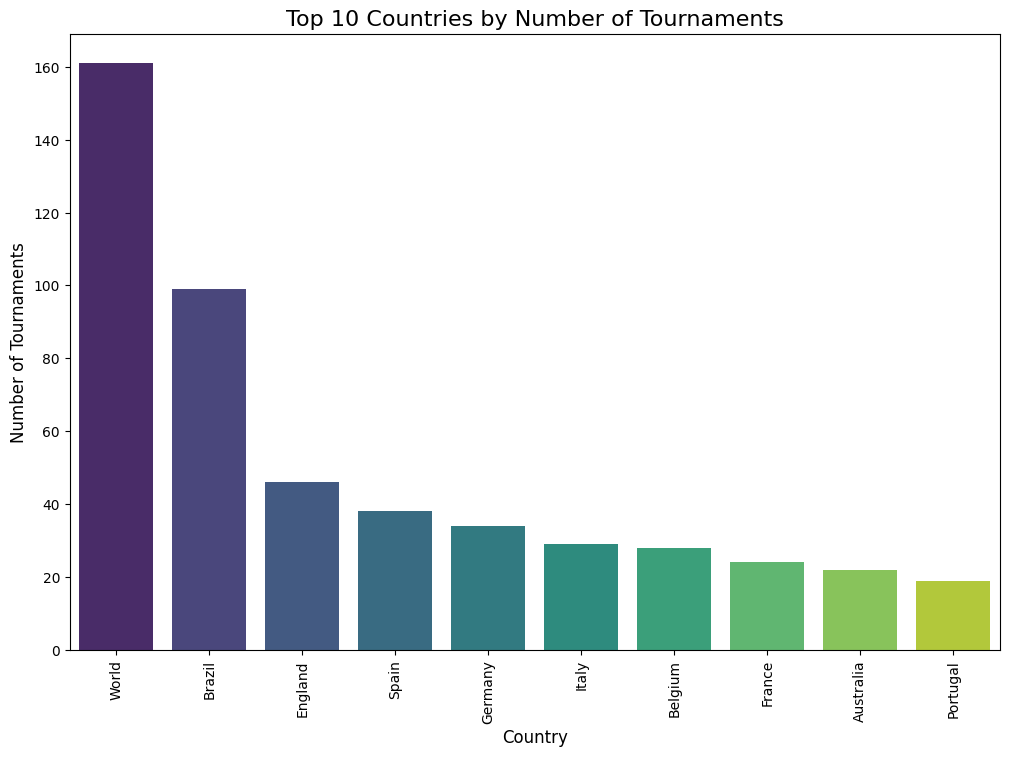

In [3]:
# Count the number of tournaments per country
"""
Counts the number of tournaments per country and plots the top 10 countries.
This function performs the following steps:
1. Counts the number of tournaments for each country using the 'country_name' column from the 'leagues' DataFrame.
2. Selects the top 10 countries with the highest number of tournaments.
3. Plots a bar chart of the top 10 countries by the number of tournaments.
Variables:
    tournaments_per_country (Series): A pandas Series containing the count of tournaments per country, sorted in descending order, limited to the top 10 countries.
Plot:
    A bar chart displaying the top 10 countries by the number of tournaments.
    - X-axis: Country names
    - Y-axis: Number of tournaments
    - Title: 'Top 10 Countries by Number of Tournaments'
    - X-axis labels are rotated 90 degrees for better readability.
"""
tournaments_per_country = leagues['country_name'].value_counts()


plt.figure(figsize=(12, 8))
sns.barplot(x=tournaments_per_country.index[:10], y=tournaments_per_country.values[:10], palette='viridis')
plt.title('Top 10 Countries by Number of Tournaments', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Tournaments', fontsize=12)
plt.xticks(rotation=90)
plt.show()


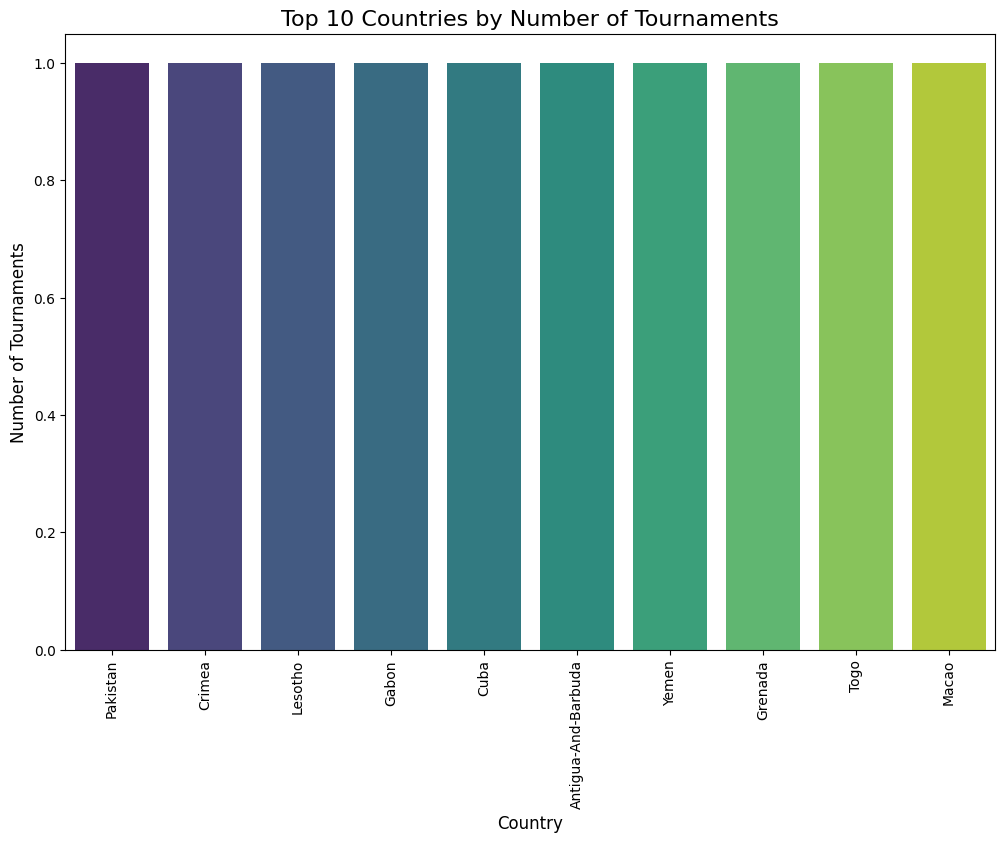

In [4]:
plt.figure(figsize=(12, 8))
sns.barplot(x=tournaments_per_country.index[-10:], y=tournaments_per_country.values[-10:], palette='viridis')
plt.title('Top 10 Countries by Number of Tournaments', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Tournaments', fontsize=12)
plt.xticks(rotation=90)
plt.show()

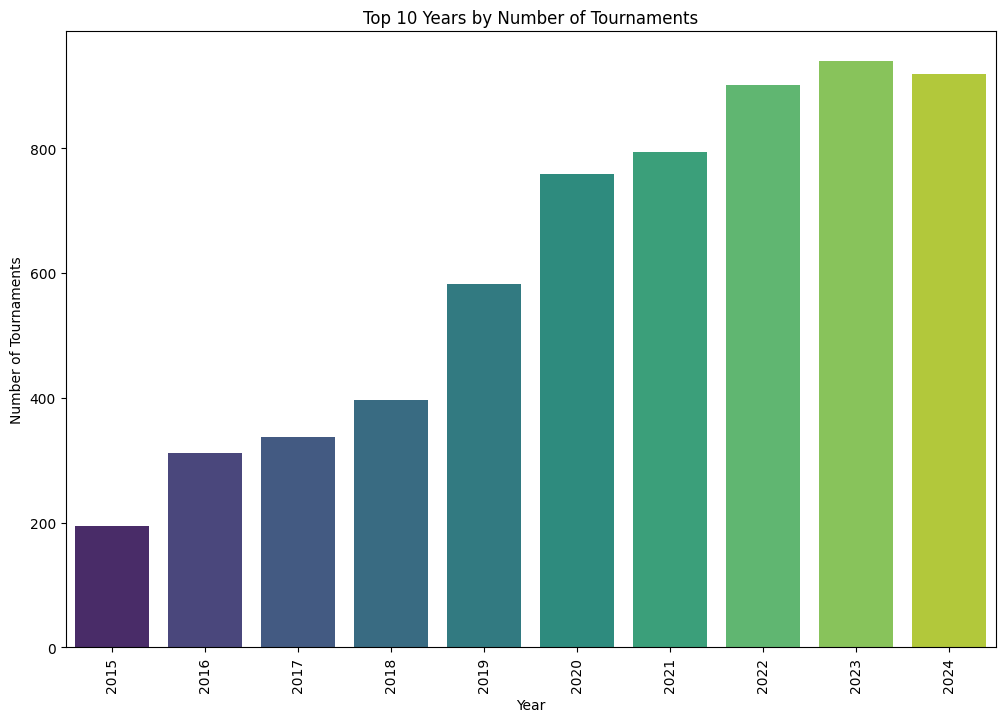

In [5]:
# Explode the 'seasons' column to separate each season into its own row
"""
Explode the 'seasons' column to separate each season into its own row.
Extract the 'year' from the 'seasons' column.
Count the number of tournaments per year.
Plot the data showing the top 10 years by the number of tournaments.
Steps:
1. Explode the 'seasons' column to create a new row for each season.
2. Extract the 'year' from each season and create a new 'year' column.
3. Count the number of tournaments for each year and select the top 10 years.
4. Plot the top 10 years by the number of tournaments using a bar chart.
"""
leagues_exploded = leagues.explode('seasons')

# Extract the 'year' from the 'seasons' column
leagues_exploded['year'] = leagues_exploded['seasons'].apply(lambda x: x['year'])

# Count the number of tournaments per year
tournaments_per_year = leagues_exploded['year'].value_counts()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x=tournaments_per_year.index[:10], y=tournaments_per_year.values[:10], palette='viridis')
plt.title('Top 10 Years by Number of Tournaments')
plt.xlabel('Year')
plt.ylabel('Number of Tournaments')
plt.xticks(rotation=90)
plt.show()


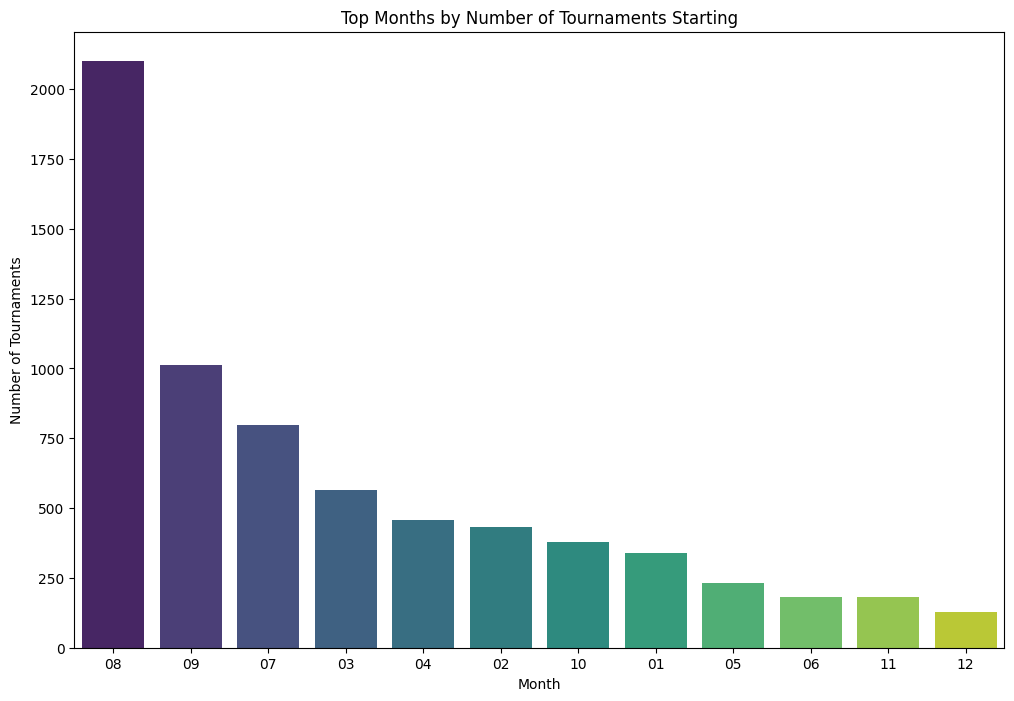

In [6]:
leagues_exploded['start'] = leagues_exploded['seasons'].apply(lambda x: x['start'])


top_start_date = leagues_exploded['start'].value_counts().head(10)
leagues_exploded[['start_year', 'start_month', 'start_day']] = leagues_exploded['start'].str.split('-', expand=True)

months_start_date = leagues_exploded['start_month'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=months_start_date.index, y=months_start_date.values, palette='viridis')
plt.title('Top Months by Number of Tournaments Starting')
plt.xlabel('Month')
plt.ylabel('Number of Tournaments')
plt.show()



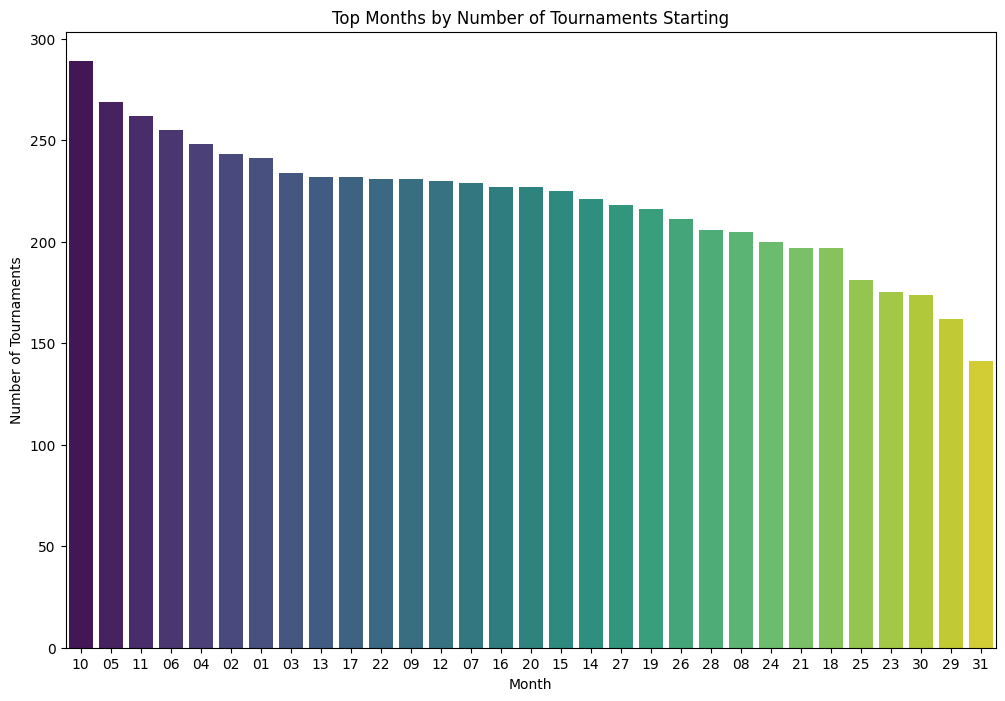

In [7]:
days_start_date = leagues_exploded['start_day'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=days_start_date.index, y=days_start_date.values, palette='viridis')
plt.title('Top Months by Number of Tournaments Starting')
plt.xlabel('Month')
plt.ylabel('Number of Tournaments')
plt.show()

In [ ]:
from IPython.display import display

# Add a new column 'current' to indicate if the league is currently active
leagues_exploded['current'] = leagues_exploded['seasons'].apply(lambda x: x['current'])

# Filter the DataFrame to include only the current leagues
current_leagues = leagues_exploded[leagues_exploded['current'] == True]

# Display the filtered DataFrame with selected columns
display(current_leagues[['league_id', 'league_name', 'country_name', 'year']])

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,league_id,league_name,country_name,year
0,4,Euro Championship,World,2024
1,21,Confederations Cup,World,2017
2,61,Ligue 1,France,2024
3,144,Jupiler Pro League,Belgium,2024
4,71,Serie A,Brazil,2024
...,...,...,...,...
1158,1145,Paraense B1,Brazil,2024
1159,1146,Alagoano - 2,Brazil,2024
1160,1148,Maranhense - 2,Brazil,2024
1161,1083,UEFA Championship - Women - Qualification,World,2025
